# Ugulava George Assignment 4 : Outlier analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN,KMeans
import pandas as pd
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
from collections import Counter

In [2]:
data = pd.read_excel('Online Retail.xlsx')

# Global outliers.

In [3]:
X = data.copy()
del X['InvoiceNo']
del X['StockCode']
del X['Description']
del X['InvoiceDate']
del X['CustomerID']
del X['Country']
colors = np.array(['r','g','b','c','m','y'])
uniq = []
# WE add only uniq pairs of attributes Quantity and UnitPrice.
# Also from common sence we know that Quantity and UnitPrice
# cannot be negative.(we do not add noice to clusterization)
for x,y in X.as_matrix():
    if ([x,y] not in uniq and x > 0 and y > 0):
        uniq.append([x,y])
print(len(uniq))

6450


In [4]:
labels = DBSCAN(eps = 2000,min_samples = 100).fit_predict(uniq)
print(Counter(labels))
# outliers has label -1

Counter({0: 6445, -1: 5})


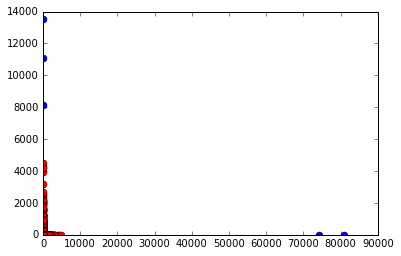

In [5]:
# visualization
i = 0
for [x,y] in uniq:
    color = colors[labels[i]]
    if labels[i] == -1:
        color = 'b'
    plt.plot(x,y, 'o', markerfacecolor = color, markersize = 7)
    i += 1 
plt.show()

## This tuples are outliers because on the picture we can that diffrence in values with the rest is not just significant it is enormous.(Used method - dbscan clustering, working with density of objects in a space. I took Quality and UnitPrice because id's are meaningles and counrys will be described below)

# Contextual outliers

## The most interesting in this data set unpredictable became the counry feature.

In [13]:
countries = data['Country']
for country, count in Counter(countries).items():
    print(country, ' : ' ,count)

Australia  :  1259
Lithuania  :  35
Lebanon  :  45
Saudi Arabia  :  10
Austria  :  401
Hong Kong  :  288
Denmark  :  389
Sweden  :  462
United Kingdom  :  495478
Switzerland  :  2002
France  :  8557
Japan  :  358
Iceland  :  182
Belgium  :  2069
Singapore  :  229
Israel  :  297
USA  :  291
RSA  :  58
Norway  :  1086
Poland  :  341
Bahrain  :  19
EIRE  :  8196
Spain  :  2533
Unspecified  :  446
Brazil  :  32
Cyprus  :  622
Channel Islands  :  758
Netherlands  :  2371
Portugal  :  1519
Canada  :  151
Greece  :  146
Germany  :  9495
United Arab Emirates  :  68
Czech Republic  :  30
Malta  :  127
European Community  :  61
Finland  :  695
Italy  :  803


## Summing this we can conclude that European countries are in 538628 orders which is 99,39% of all billings. So if we are talking about country clusters EU cluster is dominat, and others(America, Australia, Asia) are contextual outliers in terms of number of bills per continent. Used method - simple statistics, which estimate number of Bills per continent.

# Collective outliers.

## So now, there are two ways now. 
### A) First is easy - continuing my context outliers  proposition. We just cluster outliers as : 1) North-South America(USA, Canada, Brazil), 2) Africa-Arabian(Lebanon,Saudi Arabia,Bahrain,United Arab Emirates), 3) Asia(Japan,Hong Kong,Singapore), 4) Australia. There are 4 clusters of utliers whithin whole outliers cluster(in terms of Country/number of bills). 
### B) Second we can run DBSCAN to find collective outliers in terms of Quantity/UnitPrice.

In [7]:
labels_2 = DBSCAN(eps = 500,min_samples = 3).fit_predict(uniq)
print(Counter(labels_2))

Counter({0: 6437, -1: 9, 1: 4})


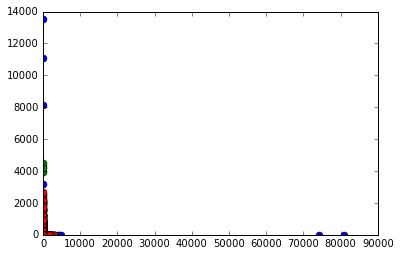

In [8]:
# visualization
i = 0
for [x,y] in uniq:
    color = colors[labels_2[i]]
    if labels_2[i] == -1:
        color = 'b'
    plt.plot(x,y, 'o', markerfacecolor = color, markersize = 7)
    i += 1 
plt.show()

### Now green cluster is a collective outlier. So, efficency of DBSCAN depend of the epsilon and min_samples value very strong and while Processing it Build a huge N^2 matrics which costs a lot of memory, so if try to use it for example on whole data set(without removing some parametrs, noise and making value distinct) it consumes so much memory that my 12 GB RAM laptop just kill the process any time i tried:)